In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.metrics import silhouette_score

K_RANGE = range(2, 6)
silhouette_scores = {}

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    if k > 1:
        silhouette_scores[k] = silhouette_score(X_scaled, labels)

optimal_k = max(silhouette_scores, key=silhouette_scores.get) if silhouette_scores else 3
print(f"Optimal K found: {optimal_k}")


final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_scaled)

Optimal K found: 2


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster_Label'] = cluster_labels
X_pca_df['True_Species'] = y_true

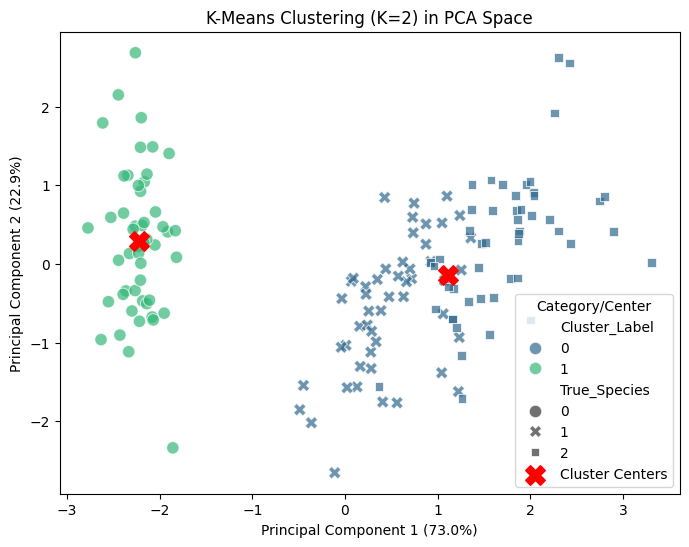

In [6]:
cluster_centers_pca = pca.transform(final_kmeans.cluster_centers_)

plt.figure(figsize=(8,6))


sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster_Label', style='True_Species',
    data=X_pca_df, palette='viridis', s=80, alpha=0.7
)


plt.scatter(
    cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
    marker='X', s=200, color='red', label='Cluster Centers'
)

plt.title(f'K-Means Clustering (K={optimal_k}) in PCA Space')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend(title='Category/Center', loc='best')
plt.show()


In [7]:
cluster_counts = pd.Series(cluster_labels).value_counts()
print("Cluster sizes:\n", cluster_counts)


cluster_vs_species = pd.crosstab(X_pca_df['Cluster_Label'], X_pca_df['True_Species'])
print("\nCluster vs True Species:\n", cluster_vs_species)


Cluster sizes:
 0    100
1     50
Name: count, dtype: int64

Cluster vs True Species:
 True_Species    0   1   2
Cluster_Label            
0               0  50  50
1              50   0   0


In [8]:
X['Cluster_Label'] = cluster_labels
print("\nOriginal dataset with cluster labels:\n", X.head())


Original dataset with cluster labels:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster_Label  
0              1  
1              1  
2              1  
3              1  
4              1  
